In [1]:
# Ryanrudes' implementation adjusted for pong: https://github.com/ryanrudes/minimal_goexplore
from collections import defaultdict
from time import sleep
import numpy as np
import cv2
import sys
import gym

def cellfn(frame):
    cell = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cell = cv2.resize(cell, (11, 8), interpolation = cv2.INTER_AREA)
    cell = cell // 32
    return cell

def hashfn(cell):
    return hash(cell.tobytes())

class Weights:
    times_chosen = 0.1
    times_chosen_since_new = 0
    times_seen = 0.3

class Powers:
    times_chosen = 0.5
    times_chosen_since_new = 0.5
    times_seen = 0.5

class Cell(object):
    def __init__(self):
        self.times_chosen = 0
        self.times_chosen_since_new = 0
        self.times_seen = 0

    def __setattr__(self, key, value):
        object.__setattr__(self, key, value)
        if key != 'score' and hasattr(self, 'times_seen'):
            self.score = self.cellscore()

    def cntscore(self, a):
        w = getattr(Weights, a)
        p = getattr(Powers, a)
        v = getattr(self, a)
        return w / (v + e1) ** p + e2

    def cellscore(self):
        return self.cntscore('times_chosen')           +\
               self.cntscore('times_chosen_since_new') +\
               self.cntscore('times_seen')             +\
               1

    def visit(self):
        self.times_seen += 1
        return self.times_seen == 1

    def choose(self):
        self.times_chosen += 1
        self.times_chosen_since_new += 1
        return self.ram, self.reward, self.trajectory

archive = defaultdict(lambda: Cell())
highscore = 0
frames = 0

e1 = 0.001
e2 = 0.00001

env = gym.make("MontezumaRevengeDeterministic-v4")
frame = env.reset()
score = 0
action = 0
trajectory = []
iterations = 0




A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [2]:
s = env.reset()
import matplotlib.pyplot as plt

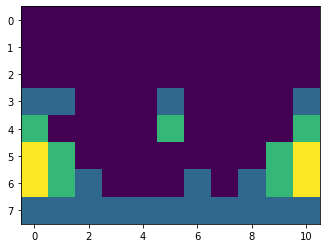

In [3]:
plt.imshow(cellfn(s))

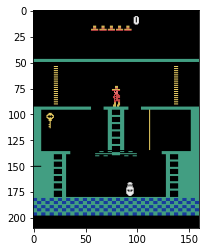

In [4]:
plt.imshow(s)

In [ ]:
from tqdm import tqdm
for _ in tqdm(range(50000)):
    found_new_cell = False

    for i in range(100):
        if np.random.random() > 0.95:
            action = env.action_space.sample()

        frame, reward, terminal, info = env.step(action)
        #print(info)
        #if iterations % 100 == 0:
        #    env.render()
        score += reward
        #terminal |= info['lives'] < 6

        trajectory.append(action)
        frames += 1

        if score > highscore:
            highscore = score

        if terminal:
            break
        else:
            cell = cellfn(frame)
            cellhash = hashfn(cell)
            cell = archive[cellhash]
            first_visit = cell.visit()
            if first_visit or score > cell.reward or score == cell.reward and len(trajectory) < len(cell.trajectory):
                cell.ram = env.env.clone_full_state()
                cell.reward = score
                cell.trajectory = trajectory.copy()
                cell.times_chosen = 0
                cell.times_chosen_since_new = 0
                found_new_cell = True

    if found_new_cell and iterations > 0:
        restore_cell.times_chosen_since_new = 0

    iterations += 1
    scores = np.array([cell.score for cell in archive.values()])
    hashes = [*archive]
    probs = scores / scores.sum()
    restore = np.random.choice(hashes, p = probs)
    restore_cell = archive[restore]
    ram, score, trajectory = restore_cell.choose()
    env.reset()
    env.env.restore_full_state(ram)

    if iterations % 500 == 0:
        print("Iterations: %d, Cells: %d, Frames: %d, Max Reward: %d" % (iterations, len(archive), frames, highscore))

  0%|                                                 | 0/50000 [00:00<?, ?it/s]/home/elgutto/Documents/masters/goexplore/atari/lib/python3.8/site-packages/gym/envs/atari/environment.py:353: UserWarning: WARN: `clone_full_state()` is deprecated and will be removed in a future release of `ale-py`. Please use `clone_state(include_rng=True)` which is equivalent to `clone_full_state`. 
  logger.warn(
/home/elgutto/Documents/masters/goexplore/atari/lib/python3.8/site-packages/gym/envs/atari/environment.py:361: UserWarning: WARN: restore_full_state() is deprecated and will be removed in a future release of `ale-py`. Please use `restore_state(state)` which will restore the state regardless of being a full or partial state. 
  logger.warn(
  1%|▍                                      | 502/50000 [00:33<55:28, 14.87it/s]

Iterations: 500, Cells: 237, Frames: 44648, Max Reward: 0


  2%|▊                                     | 1002/50000 [01:06<54:37, 14.95it/s]

Iterations: 1000, Cells: 293, Frames: 89816, Max Reward: 0


  3%|█▏                                    | 1503/50000 [01:39<50:02, 16.15it/s]

Iterations: 1500, Cells: 308, Frames: 135397, Max Reward: 0


  4%|█▌                                    | 2001/50000 [02:12<54:17, 14.74it/s]

Iterations: 2000, Cells: 325, Frames: 180465, Max Reward: 0


  5%|█▉                                    | 2503/50000 [02:45<42:48, 18.49it/s]

Iterations: 2500, Cells: 333, Frames: 225504, Max Reward: 0


  6%|██▎                                   | 3002/50000 [03:18<50:55, 15.38it/s]

Iterations: 3000, Cells: 381, Frames: 271408, Max Reward: 100


  7%|██▋                                   | 3502/50000 [03:48<50:40, 15.29it/s]

Iterations: 3500, Cells: 515, Frames: 313137, Max Reward: 100


  8%|███                                   | 4003/50000 [04:19<46:24, 16.52it/s]

Iterations: 4000, Cells: 923, Frames: 354877, Max Reward: 500


  9%|███▍                                  | 4501/50000 [04:49<47:25, 15.99it/s]

Iterations: 4500, Cells: 1079, Frames: 397182, Max Reward: 500


 10%|███▊                                  | 5002/50000 [05:20<49:07, 15.27it/s]

Iterations: 5000, Cells: 1139, Frames: 440248, Max Reward: 500


 11%|████▏                                 | 5503/50000 [05:51<43:02, 17.23it/s]

Iterations: 5500, Cells: 1178, Frames: 484059, Max Reward: 500


 12%|████▌                                 | 6003/50000 [06:23<42:12, 17.37it/s]

Iterations: 6000, Cells: 1434, Frames: 528023, Max Reward: 2500


 13%|████▉                                 | 6503/50000 [06:53<42:56, 16.88it/s]

Iterations: 6500, Cells: 1564, Frames: 572301, Max Reward: 2500


 14%|█████▎                                | 7001/50000 [07:24<45:11, 15.86it/s]

Iterations: 7000, Cells: 1615, Frames: 616604, Max Reward: 2500


 15%|█████▋                                | 7502/50000 [07:54<39:21, 17.99it/s]

Iterations: 7500, Cells: 1645, Frames: 660665, Max Reward: 2500


 16%|██████                                | 8001/50000 [08:25<44:24, 15.76it/s]

Iterations: 8000, Cells: 1682, Frames: 705057, Max Reward: 2500


 17%|██████▍                               | 8503/50000 [08:57<44:40, 15.48it/s]

Iterations: 8500, Cells: 1712, Frames: 749854, Max Reward: 2500


 18%|██████▊                               | 9003/50000 [09:28<41:47, 16.35it/s]

Iterations: 9000, Cells: 1738, Frames: 794574, Max Reward: 2500


 19%|███████▏                              | 9503/50000 [09:58<41:28, 16.27it/s]

Iterations: 9500, Cells: 1752, Frames: 837796, Max Reward: 2500


 20%|███████▍                             | 10002/50000 [10:30<42:04, 15.84it/s]

Iterations: 10000, Cells: 1760, Frames: 882288, Max Reward: 2500


 21%|███████▊                             | 10503/50000 [11:00<39:37, 16.61it/s]

Iterations: 10500, Cells: 1774, Frames: 926200, Max Reward: 2500


 22%|████████▏                            | 11002/50000 [11:31<39:08, 16.60it/s]

Iterations: 11000, Cells: 1787, Frames: 970585, Max Reward: 2500


 23%|████████▌                            | 11502/50000 [12:02<42:37, 15.05it/s]

Iterations: 11500, Cells: 1798, Frames: 1014582, Max Reward: 2500


 24%|████████▉                            | 12002/50000 [12:32<43:23, 14.60it/s]

Iterations: 12000, Cells: 1803, Frames: 1058696, Max Reward: 2500


 25%|█████████▎                           | 12502/50000 [13:03<38:26, 16.26it/s]

Iterations: 12500, Cells: 1815, Frames: 1103327, Max Reward: 2500


 26%|█████████▌                           | 13002/50000 [13:34<38:36, 15.97it/s]

Iterations: 13000, Cells: 1820, Frames: 1147959, Max Reward: 2500


 27%|█████████▉                           | 13501/50000 [14:04<40:53, 14.88it/s]

Iterations: 13500, Cells: 1825, Frames: 1192126, Max Reward: 2500


 28%|██████████▎                          | 14002/50000 [14:34<36:41, 16.35it/s]

Iterations: 14000, Cells: 1832, Frames: 1236471, Max Reward: 2500


 29%|██████████▋                          | 14502/50000 [15:04<34:14, 17.28it/s]

Iterations: 14500, Cells: 1834, Frames: 1280446, Max Reward: 2500


 30%|███████████                          | 15004/50000 [15:34<28:45, 20.29it/s]

Iterations: 15000, Cells: 1855, Frames: 1325157, Max Reward: 2500


 31%|███████████▍                         | 15503/50000 [16:04<34:41, 16.57it/s]

Iterations: 15500, Cells: 1861, Frames: 1369911, Max Reward: 2500


 32%|███████████▊                         | 16003/50000 [16:33<32:52, 17.24it/s]

Iterations: 16000, Cells: 1865, Frames: 1414322, Max Reward: 2500


 33%|████████████▏                        | 16502/50000 [17:03<33:30, 16.66it/s]

Iterations: 16500, Cells: 1870, Frames: 1458455, Max Reward: 2500


 34%|████████████▌                        | 17002/50000 [17:31<33:51, 16.24it/s]

Iterations: 17000, Cells: 1876, Frames: 1502284, Max Reward: 2500


 35%|████████████▉                        | 17502/50000 [18:00<33:24, 16.22it/s]

Iterations: 17500, Cells: 1879, Frames: 1546190, Max Reward: 2500


 36%|█████████████▎                       | 18003/50000 [18:29<31:05, 17.16it/s]

Iterations: 18000, Cells: 1887, Frames: 1589919, Max Reward: 2500


 37%|█████████████▋                       | 18502/50000 [18:59<31:06, 16.88it/s]

Iterations: 18500, Cells: 1893, Frames: 1634847, Max Reward: 2500


 38%|██████████████                       | 19003/50000 [19:28<32:56, 15.68it/s]

Iterations: 19000, Cells: 1895, Frames: 1679059, Max Reward: 2500


 39%|██████████████▍                      | 19503/50000 [19:58<29:29, 17.24it/s]

Iterations: 19500, Cells: 1902, Frames: 1722752, Max Reward: 2500


 40%|██████████████▊                      | 20003/50000 [20:29<27:59, 17.86it/s]

Iterations: 20000, Cells: 1904, Frames: 1766322, Max Reward: 2500


 41%|███████████████▏                     | 20503/50000 [20:58<27:59, 17.57it/s]

Iterations: 20500, Cells: 1911, Frames: 1810489, Max Reward: 2500


 42%|███████████████▌                     | 21002/50000 [21:27<30:13, 15.99it/s]

Iterations: 21000, Cells: 1916, Frames: 1854563, Max Reward: 2500


 43%|███████████████▉                     | 21503/50000 [21:56<29:26, 16.14it/s]

Iterations: 21500, Cells: 1931, Frames: 1898851, Max Reward: 2500


 44%|████████████████▎                    | 22001/50000 [22:25<28:02, 16.64it/s]

Iterations: 22000, Cells: 1933, Frames: 1943500, Max Reward: 2500


 45%|████████████████▋                    | 22502/50000 [22:54<26:39, 17.19it/s]

Iterations: 22500, Cells: 1939, Frames: 1988353, Max Reward: 2500


 46%|█████████████████                    | 23002/50000 [23:23<25:14, 17.83it/s]

Iterations: 23000, Cells: 1944, Frames: 2032197, Max Reward: 2500


 47%|█████████████████▍                   | 23503/50000 [23:52<27:04, 16.31it/s]

Iterations: 23500, Cells: 1951, Frames: 2076860, Max Reward: 2500


 48%|█████████████████▊                   | 24003/50000 [24:21<23:33, 18.39it/s]

Iterations: 24000, Cells: 1953, Frames: 2120930, Max Reward: 2500


 49%|██████████████████▏                  | 24503/50000 [24:50<25:03, 16.96it/s]

Iterations: 24500, Cells: 1972, Frames: 2165261, Max Reward: 2500


 50%|██████████████████▌                  | 25002/50000 [25:18<24:05, 17.30it/s]

Iterations: 25000, Cells: 2029, Frames: 2208741, Max Reward: 2500


 51%|██████████████████▊                  | 25502/50000 [25:46<22:20, 18.27it/s]

Iterations: 25500, Cells: 2090, Frames: 2251710, Max Reward: 2500


 52%|███████████████████▏                 | 26002/50000 [26:15<22:31, 17.75it/s]

Iterations: 26000, Cells: 2164, Frames: 2295163, Max Reward: 2500


 53%|███████████████████▌                 | 26503/50000 [26:43<19:23, 20.19it/s]

Iterations: 26500, Cells: 2461, Frames: 2337585, Max Reward: 2500


 54%|███████████████████▉                 | 27004/50000 [27:10<20:33, 18.65it/s]

Iterations: 27000, Cells: 2802, Frames: 2379734, Max Reward: 2500


 55%|████████████████████▎                | 27501/50000 [27:37<21:14, 17.65it/s]

Iterations: 27500, Cells: 3040, Frames: 2421179, Max Reward: 2500


 56%|████████████████████▋                | 28002/50000 [28:05<22:09, 16.55it/s]

Iterations: 28000, Cells: 3160, Frames: 2462910, Max Reward: 2500


 57%|█████████████████████                | 28503/50000 [28:33<18:23, 19.48it/s]

Iterations: 28500, Cells: 3249, Frames: 2505324, Max Reward: 2500


 58%|█████████████████████▍               | 29002/50000 [28:59<18:15, 19.17it/s]

Iterations: 29000, Cells: 3310, Frames: 2546145, Max Reward: 2500


 59%|█████████████████████▊               | 29502/50000 [29:26<20:36, 16.58it/s]

Iterations: 29500, Cells: 3368, Frames: 2587274, Max Reward: 2500


 60%|██████████████████████▏              | 30002/50000 [29:54<17:21, 19.20it/s]

Iterations: 30000, Cells: 3411, Frames: 2629243, Max Reward: 2500


 61%|██████████████████████▌              | 30502/50000 [30:20<17:09, 18.94it/s]

Iterations: 30500, Cells: 3479, Frames: 2670567, Max Reward: 2500


 62%|██████████████████████▉              | 31005/50000 [30:48<14:09, 22.36it/s]

Iterations: 31000, Cells: 3552, Frames: 2712810, Max Reward: 2600


 63%|███████████████████████▎             | 31501/50000 [31:14<15:49, 19.48it/s]

Iterations: 31500, Cells: 3650, Frames: 2753341, Max Reward: 2600


 64%|███████████████████████▋             | 32002/50000 [31:41<15:40, 19.14it/s]

Iterations: 32000, Cells: 3757, Frames: 2794021, Max Reward: 2600


 65%|████████████████████████             | 32502/50000 [32:07<15:50, 18.41it/s]

Iterations: 32500, Cells: 3835, Frames: 2834425, Max Reward: 2600


 66%|████████████████████████▍            | 33003/50000 [32:34<14:27, 19.58it/s]

Iterations: 33000, Cells: 3955, Frames: 2875316, Max Reward: 2600


 67%|████████████████████████▊            | 33502/50000 [33:00<14:25, 19.06it/s]

Iterations: 33500, Cells: 3993, Frames: 2913939, Max Reward: 2600


 68%|█████████████████████████▏           | 34004/50000 [33:26<12:59, 20.52it/s]

Iterations: 34000, Cells: 4043, Frames: 2953613, Max Reward: 2600


 69%|█████████████████████████▌           | 34503/50000 [33:52<13:31, 19.10it/s]

Iterations: 34500, Cells: 4075, Frames: 2992339, Max Reward: 2600


 70%|█████████████████████████▉           | 35003/50000 [34:17<12:02, 20.77it/s]

Iterations: 35000, Cells: 4103, Frames: 3031684, Max Reward: 2600


 71%|██████████████████████████▎          | 35503/50000 [34:43<11:11, 21.59it/s]

Iterations: 35500, Cells: 4129, Frames: 3070279, Max Reward: 2600


 72%|██████████████████████████▋          | 36003/50000 [35:09<12:26, 18.75it/s]

Iterations: 36000, Cells: 4161, Frames: 3109362, Max Reward: 2600


 73%|███████████████████████████          | 36501/50000 [35:34<10:16, 21.88it/s]

Iterations: 36500, Cells: 4184, Frames: 3148496, Max Reward: 2600


 74%|███████████████████████████▍         | 37002/50000 [36:01<12:28, 17.37it/s]

Iterations: 37000, Cells: 4211, Frames: 3188268, Max Reward: 2600


 75%|███████████████████████████▊         | 37503/50000 [36:26<09:46, 21.29it/s]

Iterations: 37500, Cells: 4237, Frames: 3227125, Max Reward: 2600


 76%|████████████████████████████         | 38002/50000 [36:52<09:35, 20.87it/s]

Iterations: 38000, Cells: 4254, Frames: 3266039, Max Reward: 2600


 77%|████████████████████████████▍        | 38505/50000 [37:18<07:43, 24.78it/s]

Iterations: 38500, Cells: 4270, Frames: 3305604, Max Reward: 2600


 78%|████████████████████████████▊        | 39002/50000 [37:45<10:10, 18.00it/s]

Iterations: 39000, Cells: 4281, Frames: 3345380, Max Reward: 2600


 79%|█████████████████████████████▏       | 39501/50000 [38:11<08:38, 20.23it/s]

Iterations: 39500, Cells: 4298, Frames: 3385358, Max Reward: 2600


 80%|█████████████████████████████▌       | 40002/50000 [38:37<10:07, 16.46it/s]

Iterations: 40000, Cells: 4309, Frames: 3424297, Max Reward: 2600


 81%|█████████████████████████████▉       | 40504/50000 [39:03<07:21, 21.49it/s]

Iterations: 40500, Cells: 4318, Frames: 3463623, Max Reward: 2600


 82%|██████████████████████████████▎      | 41003/50000 [39:29<07:35, 19.75it/s]

Iterations: 41000, Cells: 4327, Frames: 3502613, Max Reward: 2600


 83%|██████████████████████████████▋      | 41503/50000 [39:54<07:44, 18.28it/s]

Iterations: 41500, Cells: 4366, Frames: 3540230, Max Reward: 2600


 84%|███████████████████████████████      | 42004/50000 [40:20<05:22, 24.80it/s]

Iterations: 42000, Cells: 4385, Frames: 3578735, Max Reward: 2600


 85%|███████████████████████████████▍     | 42503/50000 [40:45<05:44, 21.74it/s]

Iterations: 42500, Cells: 4407, Frames: 3617186, Max Reward: 2600


 86%|███████████████████████████████▊     | 43002/50000 [41:11<04:49, 24.16it/s]

Iterations: 43000, Cells: 4426, Frames: 3656281, Max Reward: 2600


 87%|████████████████████████████████▏    | 43502/50000 [41:36<05:58, 18.13it/s]

Iterations: 43500, Cells: 4439, Frames: 3694468, Max Reward: 2600


 88%|████████████████████████████████▌    | 44003/50000 [42:02<05:20, 18.74it/s]

Iterations: 44000, Cells: 4470, Frames: 3732780, Max Reward: 2600


 89%|████████████████████████████████▉    | 44503/50000 [42:26<04:47, 19.13it/s]

Iterations: 44500, Cells: 4479, Frames: 3769247, Max Reward: 2600


 90%|█████████████████████████████████▎   | 45004/50000 [42:52<03:47, 21.95it/s]

Iterations: 45000, Cells: 4499, Frames: 3807981, Max Reward: 2600


 91%|█████████████████████████████████▋   | 45502/50000 [43:17<03:09, 23.72it/s]

Iterations: 45500, Cells: 4529, Frames: 3845469, Max Reward: 2600


 92%|██████████████████████████████████   | 46001/50000 [43:42<03:05, 21.61it/s]

Iterations: 46000, Cells: 4537, Frames: 3883586, Max Reward: 2600


 93%|██████████████████████████████████▍  | 46502/50000 [44:08<03:19, 17.51it/s]

Iterations: 46500, Cells: 4554, Frames: 3922585, Max Reward: 2600


 94%|██████████████████████████████████▊  | 47003/50000 [44:34<02:41, 18.53it/s]

Iterations: 47000, Cells: 4564, Frames: 3960289, Max Reward: 2600


 94%|██████████████████████████████████▊  | 47037/50000 [44:35<02:20, 21.04it/s]

In [7]:
c = list(archive.values())[1]

In [8]:
c

In [12]:

from gym.envs.classic_control import rendering
def repeat_upsample(rgb_array, k=1, l=1, err=[]):
    # repeat kinda crashes if k/l are zero
    if k <= 0 or l <= 0: 
        if not err: 
            err.append('logged')
        return rgb_array

    # repeat the pixels k times along the y axis and l times along the x axis
    # if the input image is of shape (m,n,3), the output image will be of shape (k*m, l*n, 3)

    return np.repeat(np.repeat(rgb_array, k, axis=0), l, axis=1)

viewer = rendering.SimpleImageViewer()

In [13]:
replay(c.trajectory)

In [10]:
def replay(trajectory):
    env.reset()
    done = False
    for action in trajectory:
        _, _, done, _ = env.step(action)
        
        rgb = env.render('rgb_array')
        img = repeat_upsample(rgb, 4, 4)
        viewer.imshow(img)
        
        if done: break
        
    env.close()

In [14]:
len(c.trajectory)

5756

In [6]:
[cell.reward for cell in archive.values()][1]

18.0